<a href="https://colab.research.google.com/github/SuzukiRyotaro1998/stock_AI/blob/main/Google_clab/light_gbm/train_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import lightgbm as lgb

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import os
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# N-Lags model check
!pip install yfinance
import yfinance as yf
# 他ファイルのインポート・リロード------------------------
import imp
import joblib

def data_process(data,save_path):
    count = 0
    preprocess_data = pd.DataFrame()

    # # 作業ディレクトリの移動と確認
    os.chdir('/content/drive/MyDrive/machine_learning/data_preprocess/')
    # 他ファイルのインポート・リロード
    import data_process
    imp.reload(data_process)
    for  file in data['symbol'] :
        count = count +1
        print(count)
        print(file)
        # try:
        df = yf.download(file, start='2014-01-01')
        df = data_process.create_data(df)
        df = df['2016-01-06':'2020-12-31']
        preprocess_data = preprocess_data.append(df)

        # except: 
        #     print('errror')
        #     continue
    # drop row contains NaN
    preprocess_data.dropna(inplace=True)
    preprocess_data.to_csv(save_path)
    print('saved')

    return preprocess_data


#全時系列データの呼び出し
model_stock = 'sandp500'
path = '/content/drive/MyDrive/stock_data/stock_code/{}.csv'.format(model_stock)
data = pd.read_csv(path)
print(data)

#データの前処理　※一度やったら飛ばす
save_path = '/content/drive/MyDrive/machine_learning/light_gbm/model/preprocss_data.csv'
df = data_process(data,save_path)




     |████████████████████████████████| 6.3MB 10.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=72d9872ea96b386765f3342386afc2eaaaf5bfa4cd51984a09a658710f8751e2
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
    symbol                 Name                  Sector
0      MMM           3M Company             Industrials
1      AOS      A.O. Smith Corp             Industrials
2      ABT  Abbott Laboratories             Health Care
3     ABBV          AbbVie Inc.             Health Care
4     ABMD              Abiomed             Health Care
..     ...                  ...                     ...
500    YUM      Yum! Brands Inc  Consumer Discretionary
501   ZBRA   Zebra Technologies  Information Technology
502    ZBH        Zimmer Biomet  

                  Open  ...  Volume_161daysago_ratio
Date                    ...                         
2016-01-06  145.589996  ...                 1.714784
2016-01-07  142.520004  ...                 1.712448
2016-01-08  141.360001  ...                 1.346747
2016-01-11  140.970001  ...                 1.156073
2016-01-12  141.360001  ...                 1.296703
...                ...  ...                      ...
2020-12-24  159.919998  ...                 0.134732
2020-12-28  161.440002  ...                 0.941206
2020-12-29  163.210007  ...                 0.629349
2020-12-30  163.509995  ...                 0.534004
2020-12-31  164.500000  ...                 0.687919

[620136 rows x 215 columns]
              sma210  ...  Adjclose_today_5daysago_ratio
Date                  ...                               
2016-01-06 -0.058017  ...                       0.945059
2016-01-07 -0.056462  ...                       0.927984
2016-01-08 -0.056371  ...                       0.9326

,feature,importance
7,adosc,0.079195
5,ratio_sma135_150,0.067327
0,sma210,0.060991
2,ratio_sma75_150,0.060341
4,ratio_sma105_150,0.059468
8,sma10,0.058264
1,ratio_sma75_30,0.055218
20,Adjclose_today_10daysago_ratio,0.048973
21,Adjclose_today_5daysago_ratio,0.048759
3,ratio_sma105_30,0.047877


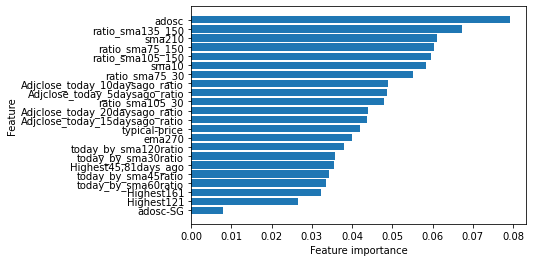

In [ ]:
model_name = 'lightgbm_0710'


df = pd.read_csv(save_path, index_col=0)
print(df)
#選択する特徴量
cols =['return','sma210'

          ,'ratio_sma75_30', 'ratio_sma75_150', 'ratio_sma105_30', 
          'ratio_sma105_150', 'ratio_sma135_150'
          ,'Highest161','adosc', 'sma10', 
        'adosc-SG' ,'typical-price',"ema270"
      ,'Highest121','Highest45,81days_ago',

'today_by_sma30ratio','today_by_sma45ratio','today_by_sma60ratio','today_by_sma120ratio'
,'Adjclose_today_20daysago_ratio','Adjclose_today_15daysago_ratio','Adjclose_today_10daysago_ratio','Adjclose_today_5daysago_ratio',


          ]


# cols =  ['return','sma210'

#           ,'ratio_sma75_30', 'ratio_sma75_150', 'ratio_sma105_30', 
#           'ratio_sma105_150', 'ratio_sma135_150'
#           ,'adosc', 'sma10'
#          ,'typical-price'
      

# ,'Adjclose_today_20daysago_ratio','Adjclose_today_10daysago_ratio','Adjclose_today_5daysago_ratio',


# 'Highest15,30days_ago','sma90'
# ,'high_low_ratio_120_sma','high_low_ratio_20_sma','high_low_ratio_40_sma','high_low_ratio_200_sma'
# ,'high_low_ratio_90_sma','high_low_ratio_270_sma',

# 'Adjclose_today_40daysago_ratio','high_low_ratio_30_sma'

#           ]

X = df[cols].copy()
y = X.pop('return')
print(X)
print(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=11)
# train用・valid用のデータセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val) 

params = {'metric': 'rmse',
          'max_depth' : 20,
          'num_leaves': 23, # 決定木の複雑度を調整（初期値31）'num_leaves': 23, # 決定木の複雑度を調整（初期値31）
          'boosting_type': 'gbdt', # 勾配ブースティング
          'objective': 'regression', # 目的 : 回帰  
          'num_leaves': 23, # 決定木の複雑度を調整（初期値31）
          'min_data_in_leaf': 15, # データの最小数（初期値20） 
          "learning_rate": 0.025400643228660445,
          'gamma':0.20387750446308275, 
          }

model = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=10000,
                early_stopping_rounds=100,
                verbose_eval=50
                )
joblib.dump(model, '/content/drive/MyDrive/machine_learning/light_gbm/model/{}.joblib'.format(model_name)) 


# 特徴量重要度の算出 (データフレームで取得)
# .drop('return',axis=1)
cols = list(X.columns)         # 特徴量名のリスト(目的変数CRIM以外)
f_importance = np.array(model.feature_importance()) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance)  # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)



# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル
# 特徴量重要度の可視化
plot_feature_importance(df_importance)


In [ ]:

# '''
# 特徴量リスト
# 脱落16
# 'Adjclose_today_40daysago_ratio','Adjclose_today_121daysago_ratio',,'high_low_ratio_30_sma'
# 脱落15
# ,'today_by_high_low_ratio_20_sma_ratio','today_by_high_low_ratio_40_sma_ratio','today_by_high_low_ratio_90_sma_ratio','today_by_high_low_ratio_120_sma_ratio'

# 脱落14
# ,'high_low_ratio_20_sma_ratio','high_low_ratio_40_sma_ratio','high_low_ratio_60_sma_ratio','Adjclose_today_15daysago_ratio','high_low_ratio_30_sma'

# 脱落13
# ,'today_by_sma120ratio','high_low_ratio','today_by_sma60ratio','today_by_sma120ratio',"ema270",


# 脱落12
# 'adosc-SG','Highest121','Highest161','today_by_sma60ratio','Highest45,81days_ago',

# 脱落11

# 'Highest81','Highest45,150days_ago','Highest15,30days_ago'

# 脱落１０
# ,'Highest121,60days_ago'
# 脱落9
# 'Highest15','adosc_ratio','Highest45','Highest61','Highest15,30days_ago' ,'Highest15,60days_ago'
# 脱落8
# ,'Highest61','adosc_ratio','Highest45', 'ratio_sma15_30','Highest15,30days_ago'
# 脱落7
# "NDM",'PDI','NDI','DX','ADX','ADXR','Standard_deviation_normalization10'
# 脱落6
# ,'aroon_up14','aroon_up20','aroon_down14','aroon_down20','aroon_ratio14','aroon_ratio20',"TrueRange","PDM"
# 脱落5
# ,"ema30","ema90","ema150","ema200", 'OBV_ratio','OBV_EMA_ratio'
# 脱落4
# ', 'mtm10','A/D','A/D_EMA','A/D_ratio','ADOSC','A/D_EMA_ratio','OBV','OBV_EMA','OBV_ratio'
# #脱落3
# , 'rsi', 'rsi-FP', 'ar26', 'br26' ,'bias20',, 'cci-SG' 'roc-SG','macd-histogram', 'roc-FP
# #脱落2
# ,'sma30',,'sma270','Highest121'
# ,'adosc_ratio', 'Volume', 'amount','sma10-FP','macd', 'macd-SG',,'Standard_deviation_normalization40'
# #脱落組
# 'Highest45','Highest81,30days_ago','Highest81','Standard_deviation_normalization30','Highest121','Highest61','Highest121,30days_ago','sma150', 'ratio_sma135_30'

# '''

In [ ]:

model = joblib.load("/content/drive/MyDrive/machine_learning/light_gbm/model/{}.joblib".format(model_name))


# # 作業ディレクトリの移動と確認
os.chdir('/content/drive/MyDrive/machine_learning/light_gbm/backtest/')
# 他ファイルのインポート・リロード
import backtest_lightgbm
imp.reload(backtest_lightgbm)


model_name_list = [model_name]
model_list = [model]
backtest_lightgbm.backtest(model_list, model_name_list,model,cols)


lightgbm_0710
    symbol                 Name                  Sector
0      MMM           3M Company             Industrials
1      AOS      A.O. Smith Corp             Industrials
2      ABT  Abbott Laboratories             Health Care
3     ABBV          AbbVie Inc.             Health Care
4     ABMD              Abiomed             Health Care
..     ...                  ...                     ...
500    YUM      Yum! Brands Inc  Consumer Discretionary
501   ZBRA   Zebra Technologies  Information Technology
502    ZBH        Zimmer Biomet             Health Care
503   ZION        Zions Bancorp              Financials
504    ZTS               Zoetis             Health Care

[505 rows x 3 columns]
1
MMM
[*********************100%***********************]  1 of 1 completed
                  Open  ...  Volume_161daysago_ratio
Date                    ...                         
2019-01-02  187.820007  ...                      NaN
2019-01-03  188.279999  ...                      NaN
201

Exception in thread Thread-577:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/yfinance/multi.py", line 170, in _download_one_threaded
    actions, period, interval, prepost, proxy, rounding)
  File "/usr/local/lib/python3.7/dist-packages/yfinance/multi.py", line 185, in _download_one
    rounding=rounding, many=True)
  File "/usr/local/lib/python3.7/dist-packages/yfinance/base.py", line 162, in history
    data = data.json()
  File "/usr/local/lib/python3.7/dist-packages/requests/models.py", line 898, in json
    return complexjson.loads(self.text, **kwargs)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    re

ストリーミング出力は最後の 5000 行に切り捨てられました。
2021-07-08   -0.011090
2021-07-09   -0.010703
Name: PH, Length: 635, dtype: float64
357
PAYX
[*********************100%***********************]  1 of 1 completed
                  Open  ...  Volume_161daysago_ratio
Date                    ...                         
2019-01-02   64.080002  ...                      NaN
2019-01-03   64.389999  ...                      NaN
2019-01-04   65.139999  ...                      NaN
2019-01-07   66.000000  ...                      NaN
2019-01-08   66.709999  ...                      NaN
...                ...  ...                      ...
2021-07-02  109.180000  ...                 1.039957
2021-07-06  109.370003  ...                 1.405904
2021-07-07  108.889999  ...                 1.559326
2021-07-08  110.910004  ...                 2.619116
2021-07-09  109.599998  ...                 1.133798

[635 rows x 215 columns]
Date
2019-01-02    0.405872
2019-01-03    0.412954
2019-01-04    1.141937
2019-01-07    0.8

KeyError: ignored